# Chess using OOP in Python
In this homework, you will implement a simple chess game with python based on OOP principles. Using OOP principles is mandatory for this homework. You may follow the guidelines and the provided helper code.

### Presentation of the game:

The board is represented by a square matrix in the terminal, where white pieces and black pieces are represented by capital and small letters, respectively. The following symbols represent the pieces:

- r, R: rook
- n, N: knight
- b, B: bishop
- q, Q: queen
- k, K: king
- p, P: pawn

Each position can be addressed with two letters (an alphabet + a digit). For example, the position "a1" contains the first white pawn on the board.



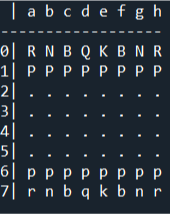

### Instructions: 
The main task is to develop the logic for moving pieces on the board. This includes checking for valid moves, capturing opponent pieces, and enforcing the rules of chess. The following is the suggested UML class design. 
By following these steps and guidelines, you can create a functional chess game in Python.

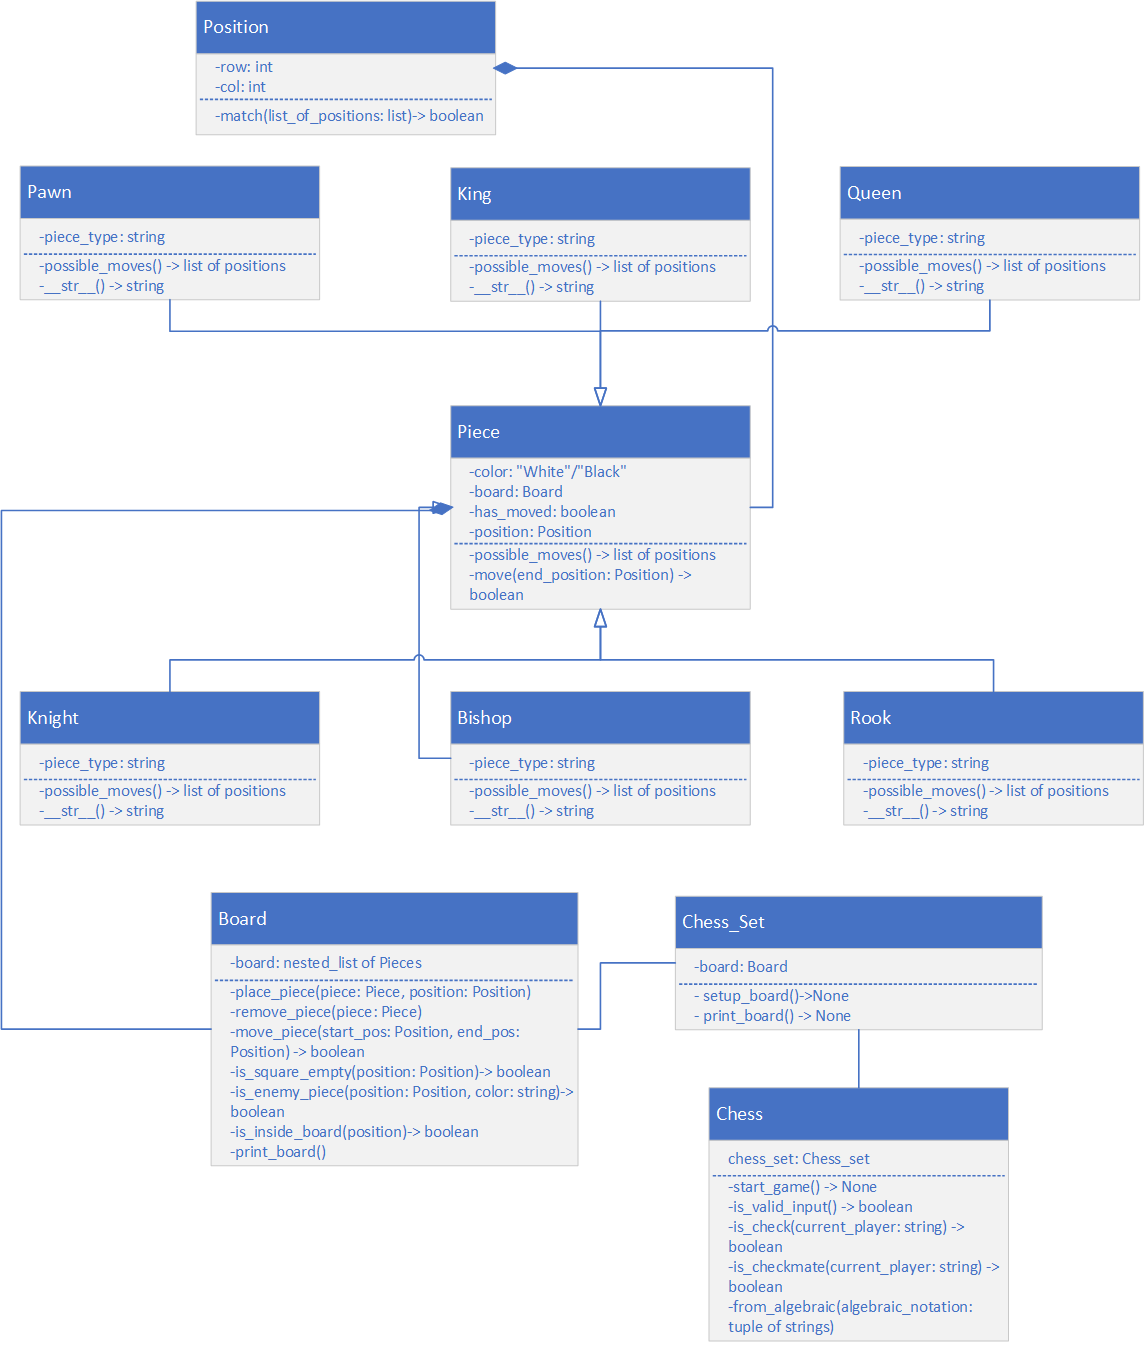

### 1. Position class:
This class  is a data structure for representing row and column and a method for searching the instanciated position object in a given list of positions (which can be empty).

In [2]:
class Position:
    def __init__(self, row, col):
        self.row = row
        self.col = col
    def match(self,list_pos):
        pass
        #TODO

### 2. Piece class:

The Piece class serves as a fundamental building block in a chess game implementation. It represents the common characteristics and behaviors shared by all chess pieces on the board.
Attributes:

- color: Represents the color of the piece, either "White" or "Black".
- position: Indicates the current position of the piece on the chessboard.
- has_moved: A boolean flag to track whether the piece has moved during the game (relevant for certain pieces like pawns and kings).
- board: the board on which the piece is placed.

Methods: 
- possible_moves: An abstract method which returns a list of possible moves for the piece
- move: if the end_position is in the list possible moves, return True otherwise return False
- ```__str__```: A string representation of the piece


In [ ]:
class Piece:
    def __init__(self, color, board, position=None):
        self.color = color
        self.board = board
        self.has_moved = False 
        self.position = position
    def possible_moves(self):
        pass
    def move(self,end_pos):
        pass
        #TODO
    def __str__(self):
        pass

### King class:
The King class represents the king chess piece in a chess game implementation. This is completely implemented as a sample for other pieces.

In [ ]:
class King(Piece):
    def __init__(self,color,board,position=None):
        super().__init__(color,board,position)
        self.piece_type = "king"
        
    def possible_moves(self):
        moves = []
        offsets = [(1, 0), (0, 1), (-1, 0), (0, -1),
                   (1, 1), (-1, 1), (1, -1), (-1, -1)]
        for dr, dc in offsets:
            new_pos = Position(self.position.row + dr, self.position.col + dc)
            if self.board.is_inside_board(new_pos) and (self.board.is_square_empty(new_pos) or self.board.is_enemy_piece(new_pos, self.color)):
                moves.append(new_pos)
        # Castling
        if not self.board.board[self.position.row][self.position.col].has_moved:
            # Check kingside castling
            if self.board.board[self.position.row][7] and not self.board.board[self.position.row][7].has_moved:
                if all(self.board.is_square_empty(Position(self.position.row, c)) for c in range(self.position.col + 1, 7)):
                    moves.append(Position(self.position.row, self.position.col + 2))
            # Check queenside castling
            if  self.board.board[self.position.row][0] and not self.board.board[self.position.row][0].has_moved:
                if all(self.board.is_square_empty(Position(self.position.row, c)) for c in range(1, self.position.col)):
                    moves.append(Position(self.position.row, self.position.col - 2))
        return moves
    def __str__(self):
        if self.color == "White":
            return "K"
        return "k" 

Implement Queen, Bishop, Rook, Pawn, Knight classes

In [ ]:
class Bishop(Piece):
    def __init__(self,color,board,position=None):
        super().__init__(color,board,position)
        self.piece_type = "bishop"
    def possible_moves(self):
        pass
        #TODO
    def __str__(self):
        if self.color == "White":
            return "B"
        return "b" 

class Pawn(Piece):
    def __init__(self,color,board,position=None):
        super().__init__(color,board,position)
        self.piece_type = "pawn"
    def possible_moves(self):
        moves = []
        direction = 1 if self.color == "White" else -1
        start_row = 1 if self.color == "White" else 6
        # Moves for regular pawn advance
        #TODO
        # Moves for capturing diagonally
        #TODO
        return moves
    def __str__(self):
        if self.color == "White":
            return "P"
        return "p" 
class Rook(Piece):
    def __init__(self,color,board,position=None):
        super().__init__(color,board,position)
        self.piece_type = "rook"
    def possible_moves(self):
        moves = []
        directions = [(1, 0), (-1, 0), (0, 1), (0, -1)]
        #TODO
        return moves
    def __str__(self):
        if self.color == "White":
            return "R"
        return "r" 

class Knight(Piece):
    def __init__(self,color,board,position=None):
        super().__init__(color,board,position)
        self.piece_type = "knight"
    def possible_moves(self):
        moves = []
        #TODO
        return moves
    def __str__(self):
        if self.color == "White":
            return "N"
        return "n" 
            
class Queen(Piece):
    def __init__(self,color,board,position=None):
        super().__init__(color,board,position)
        self.piece_type = "queen"
    def possible_moves(self):
        moves = []
        #TODO
        return moves
    def __str__(self):
        if self.color == "White":
            return "Q"
        return "q" 

### 3. Board class

The Board class initializes an empty board. This class has methods to place pieces, remove pieces, and move a piece from the starting position to the ending position if it is logically possible. Additionally, this class has helper functions to check: (i) if a position is empty; (ii) if a piece at a given position is an enemy; and (iii) if a position is within the board.

In [ ]:
class Board:
    def __init__(self):
        self.board = [[None for _ in range(8)] for _ in range(8)] #initialize the board

    def place_piece(self, piece, position):
        #TODO put the piece in the board at the given position (one line of code)
        piece.position = position

    def remove_piece(self, piece):
        self.board[piece.position.row][piece.position.col] = None

    def move_piece(self, start_pos, end_pos):
        piece = self.board[start_pos.row][start_pos.col]
        if piece:
            if piece.move(end_pos):
                #TODO (remove piece, place the piece at the end_pos and set has_moved to True)
                return True
        else:
            print("No piece at the starting position.")
            return False

    def is_square_empty(self, position):
        return self.board[position.row][position.col] is None

    def is_enemy_piece(self, position, color):
        pass
        #TODO

    def is_inside_board(self, position):
        pass
        #TODO

    def print_board(self):
        print(" | a b c d e f g h")
        print("------------------")
        for i, row in enumerate(self.board):
            row_str = str(i) + "| "
            for piece in row:
                if piece:
                    row_str += f"{piece} "
                else:
                    row_str += ". "
            print(row_str)
        print("\n")

### 4. ChessSet class

This class creates an object from the Board class and sets up the board by placing the pieces in their initial positions.


In [ ]:
class ChessSet:
    def __init__(self):
        self.board = Board()
        self.setup_board()

    def setup_board(self):
        # Place white pieces
        self.board.place_piece(Rook("White",self.board), Position(0, 0))
        #TODO - do the same rest for other pieces

        # Place black pieces
        self.board.place_piece(Rook("Black",self.board), Position(7, 0))
        #TODO - do the same rest for other pieces

    def print_board(self):
        self.board.print_board()

### 5. Chess class

"This class contains a chess_set object that saves the state of the game. The main method of this class is start_game, which repeatedly asks for starting and ending positions and applies the move if it is logically possible. The class has methods to check whether the two given positions are in the expected format (an alphabet letter followed by a digit). Additionally, the class checks whether the opponent's king is in check. For simplicity, we consider only the loss of the opponent's king as checkmate."

In [ ]:
class Chess:
    def __init__(self):
        self.chess_set = ChessSet()

    def start_game(self):
        print("Welcome to Chess!\n")
        current_player = "White"

        while True:
            self.chess_set.print_board()
            print(f"\n{current_player}'s turn:")
            start_pos = input("Enter the position of the piece you want to move (e.g., 'a2'): ")
            end_pos = input("Enter the position to move the piece to (e.g., 'a4'): ")

            #TODO - check if the input is according to the expected format
            #TODO - move the piece if it is possible, otherwise notify the user to select other moves
            #TODO - print the board
            #TODO - check if the king is in checkmate (much simpler than real-world chess)
            #TODO - check the king is in check
            #TODO - switch the turns

    def is_valid_input(self, start_pos, end_pos):
        #TODO - check each of the inputs have length of two elements and the first letter is an alphabet and the second one is a digit
        pass

    def is_check(self, current_player):
        #TODO - find current_player's king on the board, check if the king is in check
        pass

    def is_checkmate(self, current_player):
        # For simplicity, we consider losing the king as checkmate
        enemy = "Black" if current_player == "White" else "White"
        for i in range(8):
            for j in range(8):
                piece = self.chess_set.board.board[i][j]
                if piece and piece.piece_type == "king" and piece.color == enemy:
                    return False
        return True
    
    def from_algebraic(self,algebraic_notation):
        col = ord(algebraic_notation[0]) - ord('a')
        row = int(algebraic_notation[1])
        return Position(row,col)

if __name__ == "__main__":
    chess_game = Chess()
    chess_game.start_game()